In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
plt.style.use("ggplot")

# Part A

### Exercise 1

In [92]:
def is_palindrome(lst): 
    string = str(lst)
    if len(string) <= 1 :
        return True
    if string[0] == string[len(string) - 1] :
        return is_palindrome(string[1:len(string) - 1])
    else :
        return False

### Exercise 2

In [93]:
lst = [55155,"abba",5515]

### Exercise 3

In [94]:
lst1 = []
for i in lst:
    lst1.append(is_palindrome(i))
lst1

[True, True, False]

### Exercise 4

In [95]:
def harmonic(n):
    if n < 2:
        return 1
    else:
        return 1 / n + (harmonic(n - 1))

In [96]:
harmonic(3)

1.8333333333333333

# Part B

### Exercise 1

In [97]:
try:
    df = pd.read_csv("customers.csv")
    print("Loaded")
except:
    print("Error")

Loaded


In [98]:
df

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### Exercise 2

In [99]:
df[(df["Gender"]=="Male") & (df["Income"]>20)].mean().values[1]

C:\Users\Nadav Fireman\AppData\Local\Temp\ipykernel_4444\1817758373.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[(df["Gender"]=="Male") & (df["Income"]>20)].mean().values[1]


39.91463414634146

### Exercise 3

In [100]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

### Exercise 4

In [101]:
df.groupby("Gender")["Spending Score"].mean()

Gender
Female    51.526786
Male      48.511364
Name: Spending Score, dtype: float64

### Exercise 5

In [122]:
df.groupby("Gender")["Income"].sum().head(1)

Gender
Female    6636
Name: Income, dtype: int64

### Exercise 6

In [103]:
df[(df["Income"] > 15)&(df["Spending Score"] >= 40)].shape[0]

140

### Exercise 7

In [104]:
df[(df["Gender"]=="Female")&(df["Age"]<40)].mean().values[2]

C:\Users\Nadav Fireman\AppData\Local\Temp\ipykernel_4444\2693824656.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[(df["Gender"]=="Female")&(df["Age"]<40)].mean().values[2]


59.39393939393939

### Exercise 8

##### Section a

<AxesSubplot:title={'center':'Average waste'}, xlabel='Gender'>

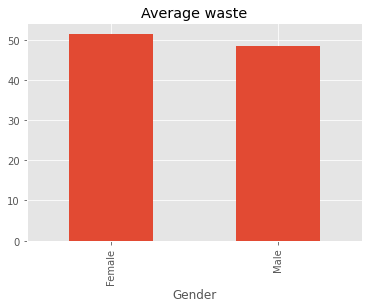

In [105]:
df.groupby("Gender")["Spending Score"].mean().plot(kind="bar" , title="Average waste")

##### Section b

<AxesSubplot:title={'center':'The amount of income'}, ylabel='Income'>

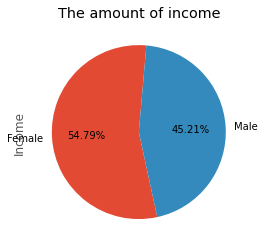

In [106]:
df.groupby("Gender")["Income"].sum().plot.pie(autopct="%1.2f%%" , startangle=85 , title="The amount of income")


# Part C

### Exercise 1

In [107]:
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Income            0
Spending Score    0
dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Exercise 2

In [109]:
dummy_data = pd.get_dummies(df)
dummy_data

,CustomerID,Age,Income,Spending Score,Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


### Exercise 3

In [110]:
dummy_data["Target"] = dummy_data["Spending Score"].apply(lambda x: 1 if x>50 else 0)

In [111]:
dummy_data

,CustomerID,Age,Income,Spending Score,Gender_Female,Gender_Male,Target
0,1,19,15,39,0,1,0
1,2,21,15,81,0,1,1
2,3,20,16,6,1,0,0
3,4,23,16,77,1,0,1
4,5,31,17,40,1,0,0
...,...,...,...,...,...,...,...
195,196,35,120,79,1,0,1
196,197,45,126,28,1,0,0
197,198,32,126,74,0,1,1
198,199,32,137,18,0,1,0


### Exercise 4

In [112]:
dummy_data.drop(columns=["CustomerID","Spending Score"], inplace=True)

In [113]:
dummy_data

,Age,Income,Gender_Female,Gender_Male,Target
0,19,15,0,1,0
1,21,15,0,1,1
2,20,16,1,0,0
3,23,16,1,0,1
4,31,17,1,0,0
...,...,...,...,...,...
195,35,120,1,0,1
196,45,126,1,0,0
197,32,126,0,1,1
198,32,137,0,1,0


### Exercise 5

In [114]:
def normalize(col):
    m = col.max()
    return col/m

In [115]:
dummy_data[["Age","Income"]] = dummy_data[["Age","Income"]].apply(lambda x: normalize(x))
dummy_data

,Age,Income,Gender_Female,Gender_Male,Target
0,0.271429,0.109489,0,1,0
1,0.300000,0.109489,0,1,1
2,0.285714,0.116788,1,0,0
3,0.328571,0.116788,1,0,1
4,0.442857,0.124088,1,0,0
...,...,...,...,...,...
195,0.500000,0.875912,1,0,1
196,0.642857,0.919708,1,0,0
197,0.457143,0.919708,0,1,1
198,0.457143,1.000000,0,1,0


### Exercise 6

In [116]:
data = dummy_data.drop(columns=["Target"])
labels = dummy_data["Target"]

x_train,x_test,y_train,y_test = train_test_split(data,labels, test_size=0.25)

# Part D

### Exercise 1

In [117]:
accuracy = []
depth_range = range(2 , 11)

for depth in depth_range:
    tree = DecisionTreeClassifier(max_depth=depth)
    tree = tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))

accuracies = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracy})
accuracies

,Max Depth,Average Accuracy
0,2,0.66
1,3,0.62
2,4,0.68
3,5,0.62
4,6,0.56
5,7,0.56
6,8,0.56
7,9,0.62
8,10,0.60


### Exercise 2

In [118]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_train,y_train)
labels_pred = tree.predict(x_test)
metrics.confusion_matrix(y_test,y_pred)

array([[16, 10],
       [10, 14]], dtype=int64)

In [119]:
data_t={'columns' : x_train.columns , 'percentage' : tree.feature_importances_}
df_test = pd.DataFrame(data_t)
df_test

,columns,percentage
0,Age,0.58986
1,Income,0.41014
2,Gender_Female,0.00000
3,Gender_Male,0.00000


### Exercise 3

מדד הדיוק של העף אחרי 5 ענפים כבר מתחיל לרדת בגלל זה בחרתי את הכמות הזואת